# simple analysis of timecourses using z-transformation and averaging

Here, instead of using freesufer to compute t-Maps, we use the motion corrected and smoohted timecourse files (fmcpr.sm5), to extract the data from each vertex and compute t-values manually, by comparing TRs with face responses vs. TRs with control condition responses. 

### import modules

In [1]:
from surfer import Brain, Surface

from mayavi import mlab
mlab.init_notebook()

from nilearn import plotting
from nilearn.plotting.surf_plotting import load_surf_data

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

Notebook initialized with x3d backend.


### get a timeseries, detrend, normalize and put in table

In [2]:
timeSeries = load_surf_data('../landscapes/Sess01/bold/003/fmcpr.sm5.pBrain.rh.nii.gz')

#### the raw time series of a random vertex

In [3]:
nVertex = 3948

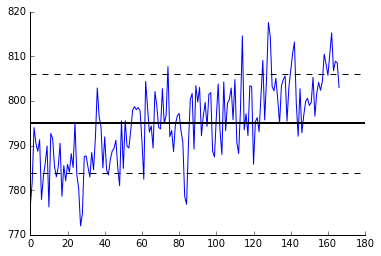

In [4]:
plt.plot(timeSeries[nVertex,:])
plt.axhline(timeSeries[nVertex,:].mean(),linewidth=2,c='k')
plt.axhline(timeSeries[nVertex,:].mean()+timeSeries[2,:].std(),linestyle='dashed',c='k')
plt.axhline(timeSeries[nVertex,:].mean()-timeSeries[2,:].std(),linestyle='dashed',c='k')
sns.despine()
plt.show()

#### after removing the linear trend

In [5]:
from scipy import signal

In [6]:
timeSeriesDet = signal.detrend(timeSeries, axis=1)

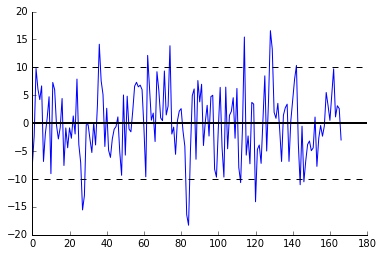

In [7]:
plt.plot(timeSeriesDet[nVertex,:])
plt.axhline(timeSeriesDet[nVertex,:].mean(),linewidth=2,c='k')
plt.axhline(timeSeriesDet[nVertex,:].mean()+timeSeriesDet[2,:].std(),linestyle='dashed',c='k')
plt.axhline(timeSeriesDet[nVertex,:].mean()-timeSeriesDet[2,:].std(),linestyle='dashed',c='k')
sns.despine()
plt.show()

#### after z-transformation

In [8]:
from sklearn import preprocessing

In [9]:
timeSeriesStd = preprocessing.scale(timeSeriesDet,axis=1)

/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


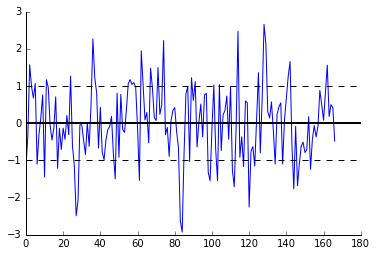

In [10]:
plt.plot(timeSeriesStd[nVertex,:])
plt.axhline(timeSeriesStd[nVertex,:].mean(),linewidth=2,c='k')
plt.axhline(timeSeriesStd[nVertex,:].mean()+timeSeriesStd[2,:].std(),linestyle='dashed',c='k')
plt.axhline(timeSeriesStd[nVertex,:].mean()-timeSeriesStd[2,:].std(),linestyle='dashed',c='k')
sns.despine()
plt.show()

In [11]:
df = pd.DataFrame(timeSeriesStd).T

we have a table with 167 rows (TRs, observations) and 111586 vertices (features)

In [12]:
df.shape

(167, 111586)

In [13]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,111576,111577,111578,111579,111580,111581,111582,111583,111584,111585
162,-2.056103,-2.134599,-1.880810,-2.169673,-2.301578,-2.418264,-1.736921,-1.861697,-2.065709,-2.203245,...,0.055097,0.279145,0.046661,0.390127,0.162642,0.409515,0.532015,0.212043,0.427483,0.383543
163,-1.303775,-1.398397,-1.389072,-1.496723,-1.658917,-1.768624,-1.418606,-1.535007,-1.685750,-1.774522,...,0.529682,0.503946,0.537682,0.832789,0.575945,0.905971,-0.163711,0.552787,0.414451,0.615147
164,-1.980712,-2.042039,-1.923806,-2.090628,-2.205452,-2.288380,-1.845805,-1.923448,-2.099297,-2.174735,...,-0.246788,-0.080975,-0.213242,0.100019,-0.181927,0.150170,-0.363010,-0.132990,-0.107079,-0.028468
165,-0.572785,-0.610939,-0.472485,-0.659419,-0.816022,-0.971471,-0.408169,-0.528243,-0.684250,-0.829459,...,-0.228869,1.498996,-0.123570,1.176978,-0.179811,0.833313,1.352190,-0.138403,1.313210,0.223985
166,-2.709744,-2.794329,-2.656606,-2.835836,-2.903605,-2.921710,-2.595127,-2.686594,-2.800455,-2.851465,...,0.943363,-0.160296,0.789155,0.559327,1.214754,0.915589,0.228155,1.390809,0.305148,1.372806


each vertex timecourse has mean zero and standard deviation one

In [14]:
df[df.columns[:10]].describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.71,-2.79,-2.66,-2.84,-2.90,-2.92,-2.60,-2.69,-2.80,-2.85
25%,-0.65,-0.63,-0.70,-0.67,-0.73,-0.73,-0.71,-0.75,-0.71,-0.75
50%,0.06,0.06,0.05,0.08,0.07,0.13,0.07,0.07,0.09,0.12
75%,0.69,0.70,0.67,0.71,0.72,0.73,0.66,0.66,0.67,0.71
max,2.04,2.06,2.07,2.12,2.19,2.21,2.08,2.15,2.22,2.25


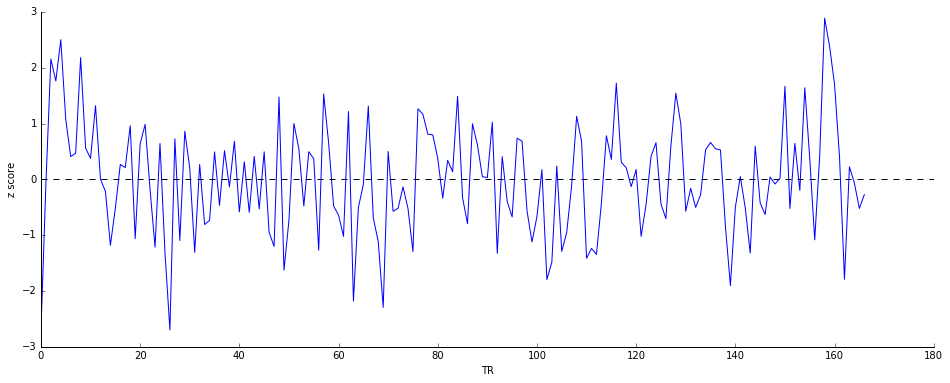

In [15]:
plt.figure(figsize=(16,6))
thisVertex = df[df.columns[10000]]
plt.plot(range(thisVertex.shape[0]),thisVertex.values)
plt.xlabel('TR')
plt.ylabel('z score')
plt.axhline(0,c='k',linewidth=1,linestyle='dashed')
sns.despine()
plt.show()

### make array which assigns TRs to the two possible conditions

In [16]:
def makeDesign(df,blockLen,firstCon=0,secondCon=1):
    # blocks are 10 TR long
    a = [(x%blockLen)==0 for x in range(df.shape[0])]
    switch = -1
    b = []
    for x in a:
        if x:
            switch = switch*-1
        b.append([99,firstCon,secondCon][switch])
    # we shift the whole design by one TR to account for HRF delay
    myAr = np.array([np.nan]+b)[:df.shape[0]]

    return myAr

In [17]:
myAr = makeDesign(df,10)

In [18]:
myAr

array([ nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### the table has an index which indicates which TR belongs to which condition

In [19]:
df.index = [myAr,df.index]

In [20]:
df.head(20)

0         1         2         3         4         5         6       \
NaN 0  -2.465580 -2.500676 -2.370225 -2.512132 -2.561240 -2.597976 -2.295516   
0.0 1  -0.463905 -0.449039 -0.334502 -0.396496 -0.342665 -0.325062 -0.243576   
    2  -0.412149 -0.376665 -0.565725 -0.333207 -0.134020  0.099098 -0.659817   
    3   0.656411  0.684794  0.602036  0.710149  0.800811  0.908315  0.568949   
    4   0.360084  0.354923  0.317620  0.353003  0.370279  0.387716  0.291454   
    5  -0.234703 -0.203065 -0.321297 -0.163640 -0.018550  0.149967 -0.371250   
    6  -0.293137 -0.216375 -0.234893 -0.124880  0.069630  0.239189 -0.213546   
    7   0.645551  0.667005  0.673693  0.665592  0.634601  0.593631  0.676405   
    8  -0.191997 -0.194290 -0.329176 -0.191347 -0.071269  0.118547 -0.415609   
    9   1.172229  1.240146  1.162786  1.287358  1.367614  1.400403  1.137630   
    10  0.343515  0.350069  0.450065  0.356009  0.292434  0.194943  0.518282   
1.0 11  0.750811  0.798217  0.630928  0.792064  0.820670  0.855954  0.527683   
    12 -0.305418 -0.294513 -0.438212 -0.278753 -0.142059  0.048093 -0.521131   
    13 -0.382101 -0.414161 -0.594636 -0.463289 -0.434044 -0.340177 -0.747369   
    14 -0.026116 -0.011786 -0.019375  0.014939  0.072440  0.130803 -0.013787   
    15  0.096355  0.188255  0.017767  0.257852  0.431124  0.580781 -0.044499   
    16 -1.479732 -1.465751 -1.584906 -1.432850 -1.250502 -0.989669 -1.640090   
    17 -1.143639 -1.123019 -1.297543 -1.115528 -1.003508 -0.853540 -1.392783   
    18 -0.294453 -0.282150 -0.266557 -0.286468 -0.321735 -0.370737 -0.249234   
    19 -0.948143 -1.054638 -0.915441 -1.177507 -1.488492 -1.793798 -0.878598   

          7         8         9         ...       111576    111577    111578  \
NaN 0  -2.372490 -2.455289 -2.524626    ...     1.669308  0.355929  1.608816   
0.0 1  -0.211867 -0.188922 -0.198372    ...     0.480281  1.644686  0.253003   
    2  -0.534215 -0.347005 -0.144771    ...     0.176161 -1.383464  0.075871   
    3   0.646641  0.723979  0.836803    ...     0.072751  0.737767  0.022309   
    4   0.301564  0.300462  0.323329    ...    -0.162029 -1.141268 -0.041815   
    5  -0.259183 -0.121421  0.033859    ...     1.671152  0.483534  1.618647   
    6  -0.131092  0.008384  0.116067    ...     0.708633 -0.881212  0.675530   
    7   0.658005  0.654839  0.617289    ...     2.270995 -0.872146  2.155480   
    8  -0.361987 -0.272723 -0.105230    ...     1.482123  1.172840  1.668302   
    9   1.208787  1.308557  1.342223    ...     0.970399  0.642026  1.047169   
    10  0.488570  0.424378  0.336452    ...     0.117542  1.339573  0.060874   
1.0 11  0.560177  0.644025  0.698639    ...     1.644570  2.028714  1.507168   
    12 -0.440778 -0.304333 -0.136211    ...     1.147911 -1.872164  1.004107   
    13 -0.783695 -0.707229 -0.635284    ...     2.112412  0.444271  2.043359   
    14  0.027829  0.093698  0.139339    ...     1.676557  1.168608  1.664768   
    15  0.082383  0.279967  0.411536    ...    -0.598503 -1.364493 -0.914961   
    16 -1.548428 -1.389254 -1.174203    ...    -1.837045 -1.765542 -2.129353   
    17 -1.323529 -1.176371 -1.050902    ...    -0.074618 -0.942312 -0.168959   
    18 -0.268014 -0.293013 -0.341653    ...    -0.964122  0.363614 -1.024846   
    19 -1.082855 -1.333345 -1.606345    ...    -0.525829  0.243079 -0.543630   

          111579    111580    111581    111582    111583    111584    111585  
NaN 0   0.901713  1.699881  1.209566  0.415697  1.685474  0.631212  1.565223  
0.0 1   1.002951  0.607670  0.335284  1.512807  0.795493  1.477010  0.709485  
    2  -0.615452  0.315610 -0.114605 -1.493958  0.388864 -1.151788  0.226300  
    3   0.556235  0.112587  0.295668  0.759593  0.205295  0.716166  0.285599  
    4  -0.922052 -0.287943 -0.424375 -1.722785 -0.551781 -1.383672 -0.703243  
    5   0.731774  1.610130  0.938468  0.910464  1.566908  0.806313  1.407454  
    6  -0.251850  0.738428  0.295437 -0.560588  0.642968 -0.545615  0.545161  
    7   0.617084

### compute two-sample t-test for each vertex

In [21]:
from scipy import stats

get rid of NaNs

In [22]:
df.fillna(0,inplace=True)

compute statistics for faces (1) vs landscapes (0)

In [23]:
t,p = stats.ttest_ind(df.loc[1],df.loc[0])

/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


each vertex has a t-Value assigned to it

In [24]:
t.shape

(111586,)

distribution of t-Values

/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


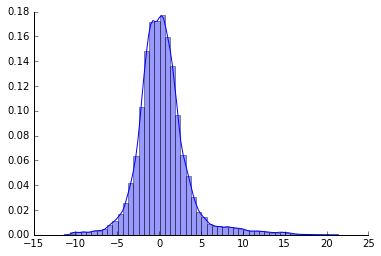

In [25]:
sns.distplot(t[abs(t)>0])
sns.despine()
plt.show()

### put all this into one function

In [26]:
def makeT(hemi,myAr=myAr,fileName='../landscapes/Sess01/bold/003/'):
    
    timeSeries = load_surf_data( '%sfmcpr.sm5.pBrain.%s.nii.gz'%(fileName,hemi) )
    timeSeriesDet = signal.detrend(timeSeries, axis=1)
    timeSeriesStd = preprocessing.scale(timeSeriesDet,axis=1)
    
    df = pd.DataFrame(timeSeriesStd).T
    df.index = [myAr,df.index]
    df.fillna(0,inplace=True)
    
    t,p = stats.ttest_ind(df.loc[1],df.loc[0])
    
    return t

t-Values for all vertices of right hemisphere

In [27]:
tRh = makeT('rh')

In [28]:
tRh

array([ 1.01525152,  1.07252026,  0.51365376, ..., -0.31711611,
       -0.74893773, -0.66027039], dtype=float32)

### show results

In [29]:
sns.set_style('dark')

In [30]:
# crop image (taken from https://github.com/mwaskom/Waskom_CerebCortex_2017/blob/master/dimensionality_reduction.ipynb)
def crop(arr):
    x, y = np.argwhere((arr != 255).any(axis=-1)).T
    return arr[x.min() - 20:x.max() + 20, y.min() - 20:y.max() + 20, :]

/opt/anaconda2/lib/python2.7/site-packages/mayavi/tools/camera.py:288: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if focalpoint is not None and not focalpoint == 'auto':


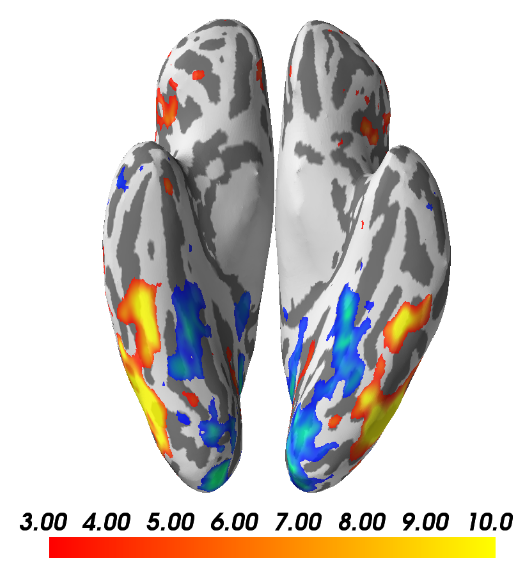

In [31]:
fig,ax = plt.subplots(1,1,figsize=(16,10))

b = Brain('pBrain', 'both', 'inflated',background='white',size=1000)


for h in ['lh','rh']:
    
    # get the map
    tData = makeT(h)
    
    # make act and deact plots
    b.add_data(tData*(-1),colorbar=False,colormap='winter',hemi=h,thresh=3,min=3,max=10,alpha=0.8)
    b.add_data(tData,colorbar=True,colormap='autumn',hemi=h,thresh=3,min=3,max=10,alpha=0.8)

b.show_view(dict(azimuth=0, elevation=180, focalpoint=[0, 0,-150]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
plt.show()

### compare with freesurfer FSFAST analysis

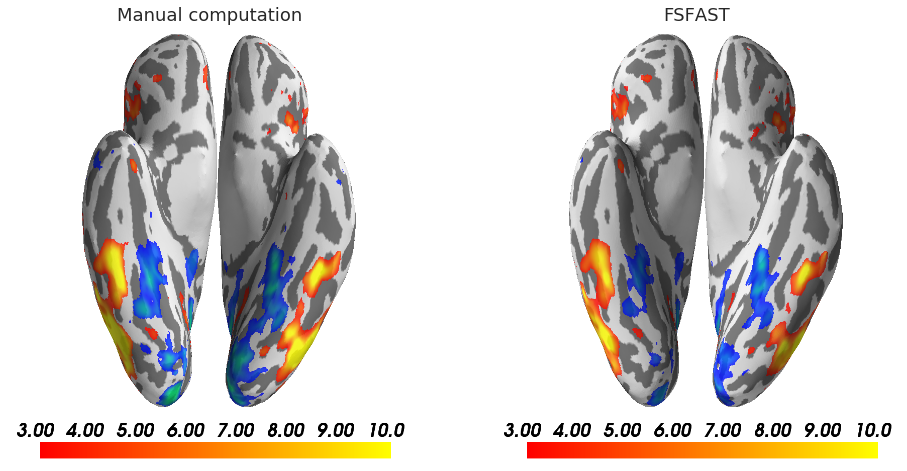

In [32]:
myThresh = 3

fig = plt.figure(figsize=(16,10))

###
ax = plt.subplot(1,2,1)

b = Brain('pBrain', 'both', 'inflated',background='white',size=1000)

for h in ['lh','rh']:
    
    # get the map
    tData = makeT(h)
    
    # make act and deact plots
    b.add_data(tData*(-1),colorbar=False,colormap='winter',hemi=h,thresh=3,min=3,max=10,alpha=0.8)
    b.add_data(tData,colorbar=True,colormap='autumn',hemi=h,thresh=3,min=3,max=10,alpha=0.8)

b.show_view(dict(azimuth=0, elevation=180, focalpoint=[0, 0,-150]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
ax.set_title('Manual computation',fontdict={'fontsize':18})

###
ax = plt.subplot(1,2,2)

b = Brain('pBrain', 'both', 'inflated',background='white',size=1000)

for h in ['lh','rh']:
    
    # get the map
    tData = load_surf_data('../landscapes/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    
    # make act and deact plots
    b.add_data(tData*(-1),colorbar=False,colormap='winter',hemi=h,thresh=3,min=3,max=10,alpha=0.8)
    b.add_data(tData,colorbar=True,colormap='autumn',hemi=h,thresh=3,min=3,max=10,alpha=0.8)

b.show_view(dict(azimuth=0, elevation=180, focalpoint=[0, 0,-150]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
ax.set_title('FSFAST',fontdict={'fontsize':18})

plt.show()

## Face vs. Hands Analysis

get and normalize timeseries of each vertex

In [33]:
timeSeries = load_surf_data('../hands/Sess01/bold/005/fmcpr.sm5.pBrain.rh.nii.gz')
timeSeriesDet = signal.detrend(timeSeries, axis=1)
timeSeriesStd = preprocessing.scale(timeSeriesDet,axis=1)

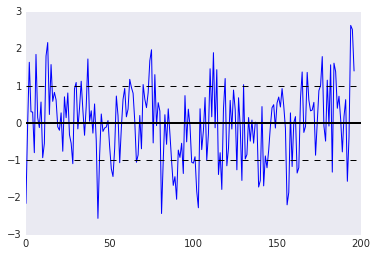

In [34]:
plt.plot(timeSeriesStd[nVertex,:])
plt.axhline(timeSeriesStd[nVertex,:].mean(),linewidth=2,c='k')
plt.axhline(timeSeriesStd[nVertex,:].mean()+timeSeriesStd[2,:].std(),linestyle='dashed',c='k')
plt.axhline(timeSeriesStd[nVertex,:].mean()-timeSeriesStd[2,:].std(),linestyle='dashed',c='k')
sns.despine()
plt.show()

In [35]:
df = pd.DataFrame(timeSeriesStd).T

In [36]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,111576,111577,111578,111579,111580,111581,111582,111583,111584,111585
192,1.796631,1.800224,2.021758,1.867770,1.906756,1.891685,2.164423,2.184325,2.149090,2.119952,...,2.629804,0.441194,2.789533,1.424689,2.346997,2.087006,-0.143216,1.978281,0.530240,1.808608
193,-0.181754,-0.059194,0.011830,0.051831,0.186135,0.253798,0.111433,0.194158,0.287160,0.321821,...,1.130228,1.049329,1.194383,1.304339,1.113545,1.388682,0.593753,1.060897,0.989839,1.150886
194,-1.799863,-1.732721,-1.495663,-1.628714,-1.536760,-1.496442,-1.302865,-1.252215,-1.238138,-1.242921,...,-0.059668,0.043016,0.126650,0.071262,-0.297016,0.120459,-0.540647,-0.571704,-0.198460,-0.430247
195,-0.078411,-0.116948,0.100704,-0.111761,-0.188060,-0.302518,0.212756,0.156671,0.071159,-0.041121,...,1.302395,-0.674793,1.359557,0.386669,1.322709,1.057156,-0.572576,1.297306,-0.261125,1.233731
196,0.219390,0.129779,0.438522,0.094027,-0.070922,-0.242434,0.588129,0.452822,0.241143,0.081945,...,0.561601,-0.851287,0.725722,-0.070044,0.431895,0.494494,-1.093431,0.225274,-0.733084,0.256149


In [37]:
df[df.columns[:10]].describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.94,-2.92,-2.92,-2.84,-2.61,-2.35,-2.88,-2.75,-2.61,-2.41
25%,-0.68,-0.67,-0.66,-0.67,-0.70,-0.71,-0.69,-0.65,-0.66,-0.64
50%,-0.13,-0.12,-0.13,-0.11,-0.14,-0.10,-0.13,-0.11,-0.13,-0.11
75%,0.61,0.63,0.60,0.63,0.63,0.60,0.60,0.61,0.59,0.60
max,2.31,2.39,2.41,2.50,2.70,2.84,2.46,2.59,2.73,2.83


here, each block is 4 TR long and the paradigm starts with faces, so the array is computed with different parameters

In [38]:
myAr = makeDesign(df,4,firstCon=1,secondCon=0)

In [39]:
myAr

array([ nan,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
         1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,
         0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
         1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
         1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,
         0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,
         1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,
         0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,
         0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
         1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,
         0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
         1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
         1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,
         0.,   0.,   1.,   1.,   1.,   1.,   0.,   

In [40]:
df.index = [myAr,df.index]

In [41]:
df.head(10)

0         1         2         3         4         5         6       \
NaN 0 -0.210129 -0.212797 -0.109274 -0.210704 -0.286784 -0.421459 -0.046538   
1.0 1 -0.227864 -0.229667 -0.075879 -0.187271 -0.173532 -0.207204  0.028466   
    2  1.940220  1.934427  1.958077  1.968428  2.032148  2.084789  1.973521   
    3  2.312191  2.389867  2.408714  2.503209  2.700508  2.844012  2.459843   
    4  1.358136  1.404069  1.316706  1.459848  1.608979  1.762903  1.276366   
0.0 5  1.698568  1.789689  1.680245  1.888144  2.100851  2.276058  1.648350   
    6  1.399195  1.405177  1.297683  1.410719  1.470572  1.547115  1.234773   
    7  1.613294  1.649126  1.666198  1.685314  1.731127  1.764240  1.694076   
    8  1.209523  1.198861  1.248377  1.204046  1.180122  1.127634  1.279473   
1.0 9  1.625541  1.642523  1.672365  1.687258  1.766515  1.829474  1.695131   

         7         8         9         ...       111576    111577    111578  \
NaN 0 -0.078241 -0.136683 -0.254951    ...     0.622079  1.342770  0.685486   
1.0 1  0.038892  0.006351 -0.033082    ...    -1.301565 -0.510808 -1.211931   
    2  2.043340  2.093680  2.151997    ...     0.895784 -0.013346  1.083416   
    3  2.587112  2.728115  2.833000    ...     1.326338  0.685627  1.495456   
    4  1.377471  1.533324  1.662993    ...     0.891518  0.898094  1.324692   
0.0 5  1.799041  2.011432  2.158589    ...     1.343400  1.690617  1.315581   
    6  1.306182  1.379060  1.474151    ...     0.812589  0.163324  0.879715   
    7  1.747807  1.787344  1.829226    ...     0.187981  1.183615  0.344589   
    8  1.291995  1.253305  1.225336    ...     1.504706  1.378096  1.851106   
1.0 9  1.740245  1.781277  1.834189    ...     1.643541  1.359839  1.800409   

         111579    111580    111581    111582    111583    111584    111585  
NaN 0  1.360053  0.673642  1.220882  0.576909  0.696533  1.121190  0.864418  
1.0 1 -0.517986 -1.205091 -0.554773 -0.248845 -1.080933 -0.445283 -0.789691  
    2  0.621526  0.739058  0.988535 -0.219725  0.573390  0.109663  0.729520  
    3  1.271244  1.141402  1.488031  0.123299  0.903386  0.689860  1.046379  
    4  1.262471  0.479904  1.568462  0.513151 -0.060854  0.788696  0.433601  
0.0 5  1.530318  1.308971  1.289133  1.947422  1.315913  1.826399  1.399132  
    6  0.384284  0.648470  0.556762  0.069498  0.410075  0.167187  0.360769  
    7  1.128714  0.091136  0.948176  0.707955 -0.009798  1.001896  0.346295  
    8  2.108967  1.272704  2.436467 -0.056880  0.867461  1.060481  1.183459  
1.0 9  1.738602  1.514143  1.945789  0.687221  1.243465  1.244973  1.414905  

[10 rows x 111586 columns]

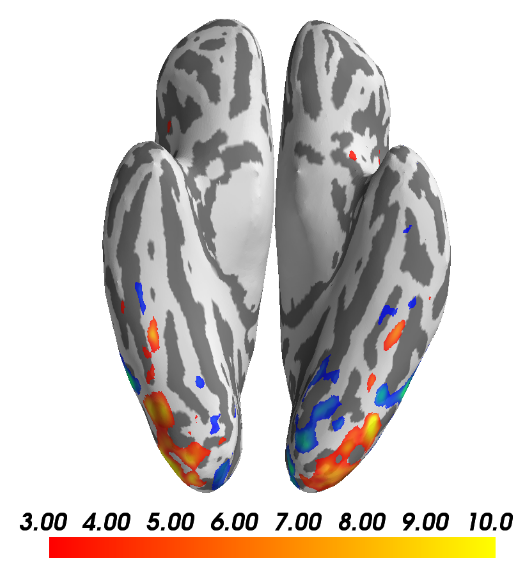

In [42]:
fig,ax = plt.subplots(1,1,figsize=(16,10))

b = Brain('pBrain', 'both', 'inflated',background='white',size=1000)


for h in ['lh','rh']:
    
    # get the map
    tData = makeT(h,myAr=myAr,fileName='../hands/Sess01/bold/005/')
    
    # make act and deact plots
    b.add_data(tData*(-1),colorbar=False,colormap='winter',hemi=h,thresh=3,min=3,max=10,alpha=0.8)
    b.add_data(tData,colorbar=True,colormap='autumn',hemi=h,thresh=3,min=3,max=10,alpha=0.8)

b.show_view(dict(azimuth=0, elevation=180, focalpoint=[0, 0,-150]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
plt.show()

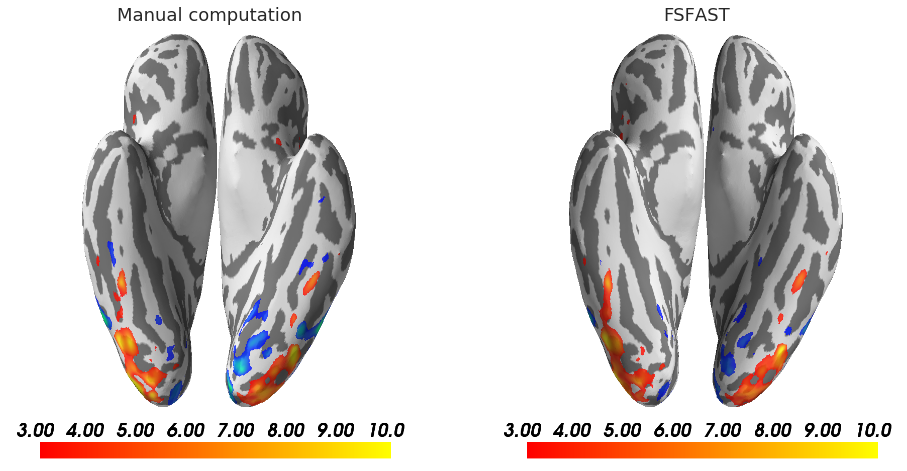

In [43]:
myThresh = 3

fig = plt.figure(figsize=(16,10))

###
ax = plt.subplot(1,2,1)

b = Brain('pBrain', 'both', 'inflated',background='white',size=1000)


for h in ['lh','rh']:
    
    # get the map
    tData = makeT(h,myAr=myAr,fileName='../hands/Sess01/bold/005/')
    
    # make act and deact plots
    b.add_data(tData*(-1),colorbar=False,colormap='winter',hemi=h,thresh=3,min=3,max=10,alpha=0.8)
    b.add_data(tData,colorbar=True,colormap='autumn',hemi=h,thresh=3,min=3,max=10,alpha=0.8)

b.show_view(dict(azimuth=0, elevation=180, focalpoint=[0, 0,-150]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
ax.set_title('Manual computation',fontdict={'fontsize':18})

###
ax = plt.subplot(1,2,2)

b = Brain('pBrain', 'both', 'inflated',background='white',size=1000)

for h in ['lh','rh']:
    
    # get the map
    tData = load_surf_data('../hands/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    
    # make act and deact plots
    b.add_data(tData*(-1),colorbar=False,colormap='winter',hemi=h,thresh=3,min=3,max=10,alpha=0.8)
    b.add_data(tData,colorbar=True,colormap='autumn',hemi=h,thresh=3,min=3,max=10,alpha=0.8)

b.show_view(dict(azimuth=0, elevation=180, focalpoint=[0, 0,-150]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
ax.set_title('FSFAST',fontdict={'fontsize':18})

plt.show()